In [92]:
%load_ext autoreload
%autoreload 1

print('please anything')

import SimpleITK as sitk
import os, sys

print('zapatos')

sys.path.append('./workflow/libs/')
%aimport utils
%aimport config
%aimport segment 
%aimport match 
%aimport missingness 
%aimport register 
%aimport evaluate 
%aimport qc 

print('yabadabodoo')

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sbn
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
please anything
zapatos
yabadabodoo


# Results Visualization 

Tool for interacting with results on exahead 

In [13]:
res = pd.read_csv('/home/exacloud/lustre1/NGSdev/evansna/cyclicIF/output/aggregated_results.csv')

# drop unnecessary columns 
res = res.drop(['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

# select only registered results -- keep R0 unregistered as this is the aligned reference 
res = res[(res.status == 'registered') | (res.round == 'R0')]

res.head()

status  core round color_channel  \
2   registered    56    R1            c1   
3   registered    56    R2            c3   
6   registered    56    R1            c4   
10  registered    56    R2            c5   
16  registered    56    R1            c5   

                                        path  center_x  center_y  width  \
2   registered_core=56_round=R1_color=c1.tif     311.0     363.0   88.0   
3   registered_core=56_round=R2_color=c3.tif       NaN       NaN    NaN   
6   registered_core=56_round=R1_color=c4.tif       NaN       NaN    NaN   
10  registered_core=56_round=R2_color=c5.tif       NaN       NaN    NaN   
16  registered_core=56_round=R1_color=c5.tif       NaN       NaN    NaN   

    height  Volume (nm^3)  Elongation  Flatness  \
2    101.0       0.281003    1.265344  1.265344   
3      NaN            NaN         NaN       NaN   
6      NaN            NaN         NaN       NaN   
10     NaN            NaN         NaN       NaN   
16     NaN            NaN         NaN       NaN   

    Oriented Bounding Box Minimum Size(nm)  \
2                                 0.544338   
3                                      NaN   
6                                      NaN   
10                                     NaN   
16                                     NaN   

    Oriented Bounding Box Maximum Size(nm)  Intensity Mean  \
2                                 0.654455       14.566381   
3                                      NaN             NaN   
6                                      NaN             NaN   
10                                     NaN             NaN   
16                                     NaN             NaN   

    Intensity Standard Deviation  Intensity Skewness  component  \
2                      14.113713            2.036032       65.0   
3                            NaN                 NaN        NaN   
6                            NaN                 NaN        NaN   
10                           NaN                 NaN        NaN   
16                           NaN                 NaN        NaN   

                                             img_name  \
2   R1_H3K27me3.CCNB1.CCND1.Ki67_S3_2020_01_22__13...   
3                                                 NaN   
6                                                 NaN   
10                                                NaN   
16                                                NaN   

                      protein slide_name        date  scan_id    scene note  \
2   H3K27me3.CCNB1.CCND1.Ki67         S3  2020-01-22  13485.0  Scene-1  ORG   
3                         NaN        NaN         NaN      NaN      NaN  NaN   
6                         NaN        NaN         NaN      NaN      NaN  NaN   
10                        NaN        NaN         NaN      NaN      NaN  NaN   
16                        NaN        NaN         NaN      NaN      NaN  NaN   

   file_type                                           original  cluster  \
2        tif  R1_H3K27me3.CCNB1.CCND1.Ki67_S3_2020_01_22__13...     56.0   
3        NaN                                                NaN      NaN   
6        NaN                                                NaN      NaN   
10       NaN                                                NaN      NaN   
16       NaN                                                NaN      NaN   

                                        name  jacaard_coef  dice_coef  \
2   registered_core=56_round=R1_color=c1.tif      0.631839   0.774389   
3                                        NaN           NaN        NaN   
6                                        NaN           NaN        NaN   
10                                       NaN           NaN        NaN   
16                                       NaN           NaN        NaN   

    volume_similarity  false_neg_err  false_pos_err  hausdorff_dist  \
2           -0.052407       0.245384       0.204773        0.177183   
3                 NaN            NaN            NaN             NaN   
6    

In [14]:
res[res.slide_name.isna()]

status  core round color_channel  \
3     registered    56    R2            c3   
6     registered    56    R1            c4   
10    registered    56    R2            c5   
16    registered    56    R1            c5   
18    registered    56    R2            c4   
...          ...   ...   ...           ...   
1941  registered    49    R2            c4   
1942  registered    49    R1            c2   
1949  registered    49    R2            c5   
1951  registered    49    R2            c3   
1954  registered    49    R1            c3   

                                          path  center_x  center_y  width  \
3     registered_core=56_round=R2_color=c3.tif       NaN       NaN    NaN   
6     registered_core=56_round=R1_color=c4.tif       NaN       NaN    NaN   
10    registered_core=56_round=R2_color=c5.tif       NaN       NaN    NaN   
16    registered_core=56_round=R1_color=c5.tif       NaN       NaN    NaN   
18    registered_core=56_round=R2_color=c4.tif       NaN       NaN    NaN   
...                                        ...       ...       ...    ...   
1941  registered_core=49_round=R2_color=c4.tif       NaN       NaN    NaN   
1942  registered_core=49_round=R1_color=c2.tif       NaN       NaN    NaN   
1949  registered_core=49_round=R2_color=c5.tif       NaN       NaN    NaN   
1951  registered_core=49_round=R2_color=c3.tif       NaN       NaN    NaN   
1954  registered_core=49_round=R1_color=c3.tif       NaN       NaN    NaN   

      height  Volume (nm^3)  Elongation  Flatness  \
3        NaN            NaN         NaN       NaN   
6        NaN            NaN         NaN       NaN   
10       NaN            NaN         NaN       NaN   
16       NaN            NaN         NaN       NaN   
18       NaN            NaN         NaN       NaN   
...      ...            ...         ...       ...   
1941     NaN            NaN         NaN       NaN   
1942     NaN            NaN         NaN       NaN   
1949     NaN            NaN         NaN       NaN   
1951     NaN            NaN         NaN       NaN   
1954     NaN            NaN         NaN       NaN   

      Oriented Bounding Box Minimum Size(nm)  \
3                                        NaN   
6                                        NaN   
10                                       NaN   
16                                       NaN   
18                                       NaN   
...                                      ...   
1941                                     NaN   
1942                                     NaN   
1949                                     NaN   
1951                                     NaN   
1954                                     NaN   

      Oriented Bounding Box Maximum Size(nm)  Intensity Mean  \
3                                        NaN             NaN   
6                                        NaN             NaN   
10                                       NaN             NaN   
16                                       NaN             NaN   
18                                       NaN             NaN   
...                                      ...             ...   
1941                                     NaN             NaN   
1942                                     NaN             NaN   
1949                                     NaN             NaN   
1951                                     NaN             NaN   
1954                                     NaN             NaN   

      Intensity Standard Deviation  Intensity Skewness  component img_name  \
3                              NaN                 NaN        NaN      NaN   
6                              NaN                 NaN        NaN      NaN   
10                             NaN                 NaN        NaN      NaN   
16                             NaN                 NaN        NaN      NaN   
18                             NaN                 NaN        NaN      NaN   
...                            ...                 ...        ...      ...   
194

## Available experiments 

why isn't `R0` available here? 


In [16]:
res[['slide_name', 'scene', 'round']].drop_duplicates()

slide_name    scene round
2          S3  Scene-1    R1
3         NaN      NaN    R2
6         NaN      NaN    R1
22         S3  Scene-1    R2

## choose experiment 

In [ ]:
# results config params 

SCENE = 'Scene-1'
SLIDE = 'S3'

res = res[(res.slide_name )]

## Registration results 

In [18]:
# select only the DAPI results
regRes = res[res.color_channel == 'c1']
regRes.head()

status  core round color_channel  \
2   registered    56    R1            c1   
22  registered    56    R2            c1   
37  registered    76    R1            c1   
48  registered    76    R2            c1   
50  registered    79    R2            c1   

                                        path  center_x  center_y  width  \
2   registered_core=56_round=R1_color=c1.tif     311.0     363.0   88.0   
22  registered_core=56_round=R2_color=c1.tif     366.0     395.0  230.0   
37  registered_core=76_round=R1_color=c1.tif     488.0    1874.0   73.0   
48  registered_core=76_round=R2_color=c1.tif     476.0    1876.0   50.0   
50  registered_core=79_round=R2_color=c1.tif     698.0    1715.0   49.0   

    height  Volume (nm^3)  Elongation  Flatness  \
2    101.0       0.281003    1.265344  1.265344   
22    81.0       0.252949    1.204937  1.204937   
37    68.0       0.165788    1.058463  1.058463   
48    41.0       0.068276    1.162060  1.162060   
50    53.0       0.087415    1.065447  1.065447   

    Oriented Bounding Box Minimum Size(nm)  \
2                                 0.544338   
22                                0.524816   
37                                0.446220   
48                                0.278724   
50                                0.322017   

    Oriented Bounding Box Maximum Size(nm)  Intensity Mean  \
2                                 0.654455       14.566381   
22                                1.498006       12.939703   
37                                0.477217       14.419470   
48                                0.332422        7.413985   
50                                0.346214       15.658289   

    Intensity Standard Deviation  Intensity Skewness  component  \
2                      14.113713            2.036032       65.0   
22                     14.257543            1.434079       50.0   
37                     17.833409            2.926100       74.0   
48                     10.991357            3.234459       75.0   
50                     23.794041            2.068037       73.0   

                                             img_name  \
2   R1_H3K27me3.CCNB1.CCND1.Ki67_S3_2020_01_22__13...   
22  R2_PCNA.AR.ER.GATA3_S3_2020_01_23__13492-Scene...   
37  R1_H3K27me3.CCNB1.CCND1.Ki67_S3_2020_01_22__13...   
48  R2_PCNA.AR.ER.GATA3_S3_2020_01_23__13492-Scene...   
50  R2_PCNA.AR.ER.GATA3_S3_2020_01_23__13492-Scene...   

                      protein slide_name        date  scan_id    scene note  \
2   H3K27me3.CCNB1.CCND1.Ki67         S3  2020-01-22  13485.0  Scene-1  ORG   
22           PCNA.AR.ER.GATA3         S3  2020-01-23  13492.0  Scene-1  ORG   
37  H3K27me3.CCNB1.CCND1.Ki67         S3  2020-01-22  13485.0  Scene-1  ORG   
48           PCNA.AR.ER.GATA3         S3  2020-01-23  13492.0  Scene-1  ORG   
50           PCNA.AR.ER.GATA3         S3  2020-01-23  13492.0  Scene-1  ORG   

   file_type                                           original  cluster  \
2        tif  R1_H3K27me3.CCNB1.CCND1.Ki67_S3_2020_01_22__13...     56.0   
22       tif  R2_PCNA.AR.ER.GATA3_S3_2020_01_23__13492-Scene...     56.0   
37       tif  R1_H3K27me3.CCNB1.CCND1.Ki67_S3_2020_01_22__13...     76.0   
48       tif  R2_PCNA.AR.ER.GATA3_S3_2020_01_23__13492-Scene...     76.0   
50       tif  R2_PCNA.AR.ER.GATA3_S3_2020_01_23__13492-Scene...     79.0   

                                        name  jacaard_coef  dice_coef  \
2   registered_core=56_round=R1_color=c1.tif      0.631839   0.774389   
22  registered_core=56_round=R2_color=c1.tif      0.025371   0.049486   
37  registered_core=76_round=R1_color=c1.tif      0.736951   0.848557   
48  registered_core=76_round=R2_color=c1.tif      0.094109   0.172028   
50  registered_core=79_round=R2_color=c1.tif      0.825791   0.904585   

    volume_similarity  false_neg_err  false_pos_err  hausdorff_dist  \
2           -0.052407       0.245384       0.204773        0.177183   
22           0.171028       0.945887       0.954412        0.450458   
37   

# Registration Results 

Why is there such clear separation between rounds? 
- something to do with lost material? I guess we would expect later rounds to register more poorly... 

Note: R1 has better metrics than R2. 

In [44]:
vizRes = regRes[['round',*'jacaard_coef,dice_coef,volume_similarity,false_neg_err,false_pos_err,hausdorff_dist'.split(',')]]

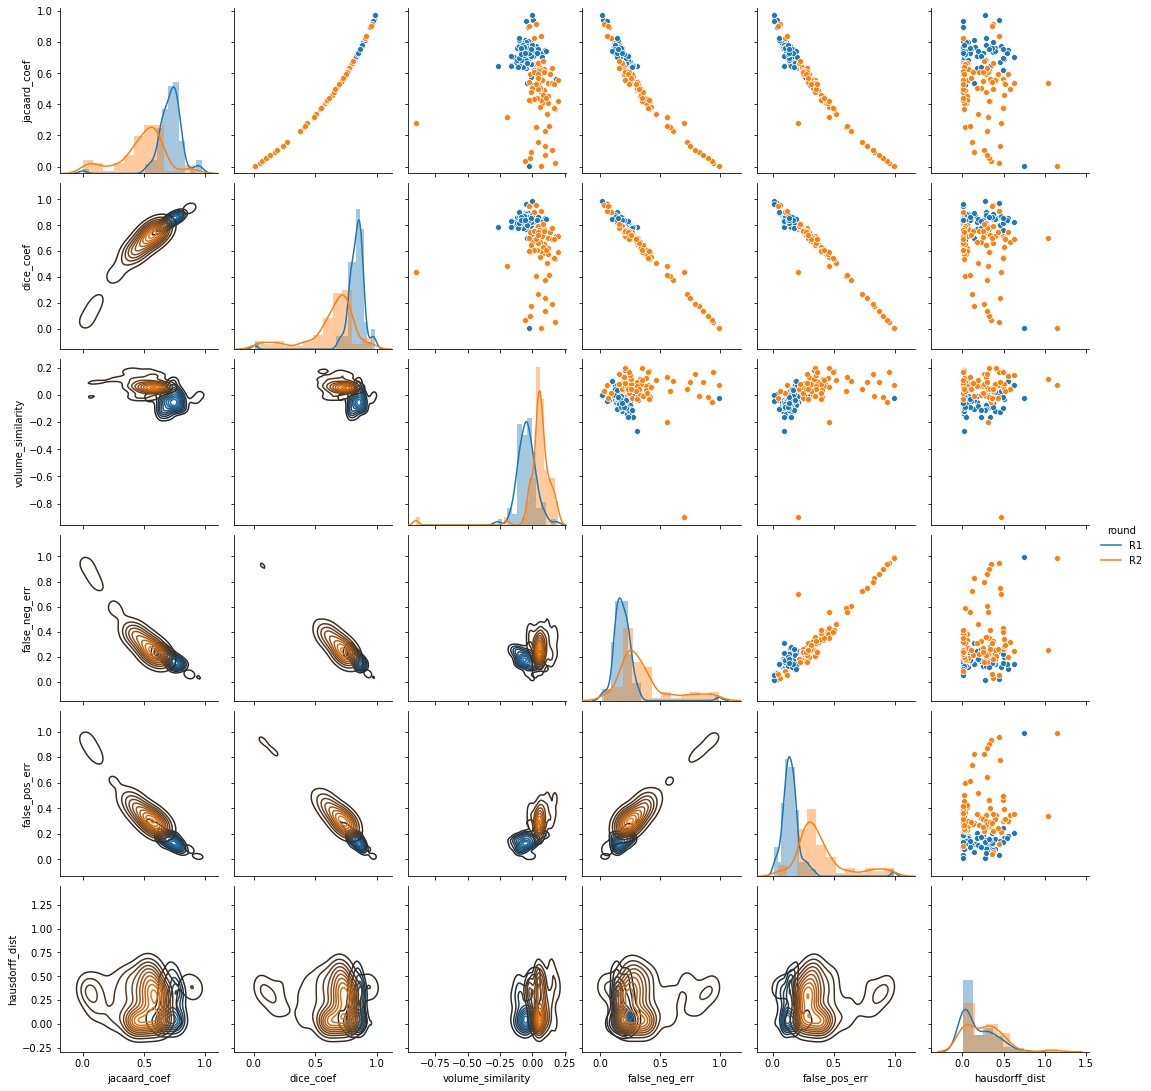

In [48]:
g = sbn.PairGrid(vizRes, hue='round')
g.map_upper(sbn.scatterplot)
g.map_diag(sbn.distplot)
g.map_lower(sbn.kdeplot)
g.add_legend()

## Outlier detection


Outlier detection does work, however, it also selects the *Really GOOD* registrations as outliers. It might be better to hardcode thresholds for **poor** registration... 

https://scikit-learn.org/stable/modules/outlier_detection.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

In [94]:
regRes['jacaard_coef,dice_coef,volume_similarity,false_neg_err,false_pos_err,hausdorff_dist'.split(',')].corr(method='spearman')

jacaard_coef  dice_coef  volume_similarity  false_neg_err  \
jacaard_coef           1.000000   1.000000          -0.487778      -0.945223   
dice_coef              1.000000   1.000000          -0.487778      -0.945223   
volume_similarity     -0.487778  -0.487778           1.000000       0.227921   
false_neg_err         -0.945223  -0.945223           0.227921       1.000000   
false_pos_err         -0.960898  -0.960898           0.659626       0.836813   
hausdorff_dist        -0.113976  -0.113976           0.150906       0.065733   

                   false_pos_err  hausdorff_dist  
jacaard_coef           -0.960898       -0.113976  
dice_coef              -0.960898       -0.113976  
volume_similarity       0.659626        0.150906  
false_neg_err           0.836813        0.065733  
false_pos_err           1.000000        0.138872  
hausdorff_dist          0.138872        1.000000

In [95]:
## Exclude jacaard and dice since they are highly correlated [by rank] with the other features
## what proportion of outliers do we expect?????

X = regRes['volume_similarity,false_neg_err,false_pos_err,hausdorff_dist'.split(',')].values

clf = IsolationForest(max_samples='auto', bootstrap=True, contamination=0.15, max_features=3)
clf.fit(X)

outliers = clf.predict(X)

_, cnts = np.unique(outliers, return_counts=True)

print(f'number of outliers: {cnts[0]}/{cnts[1]} [{100*cnts[0]/np.sum(cnts):.1f}%]')

number of outliers: 24/132 [15.4%]


In [96]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
PC = pca.transform(X)

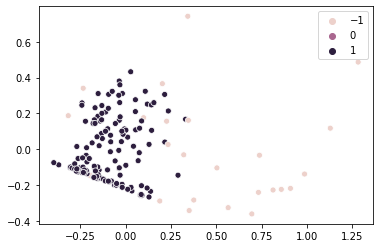

In [97]:
plt.figure()
sbn.scatterplot(PC[:,0], PC[:,1], hue=outliers)
plt.show()

In [119]:
outliersBool = outliers == -1
outRes = regRes[outliersBool]

print('number of outliers:', outRes.shape[0])

number of outliers: 24


## Manual thresholding 

We'll try just using the 10th/90th percentiles

In [105]:
vizRes.head()

round  jacaard_coef  dice_coef  volume_similarity  false_neg_err  \
2     R1      0.631839   0.774389          -0.052407       0.245384   
22    R2      0.025371   0.049486           0.171028       0.945887   
37    R1      0.736951   0.848557          -0.058312       0.175482   
48    R2      0.094109   0.172028          -0.007349       0.828601   
50    R2      0.825791   0.904585           0.012564       0.089697   

    false_pos_err  hausdorff_dist  
2        0.204773        0.177183  
22       0.954412        0.450458  
37       0.125959        0.374015  
48       0.827337        0.140101  
50       0.101063        0.011932

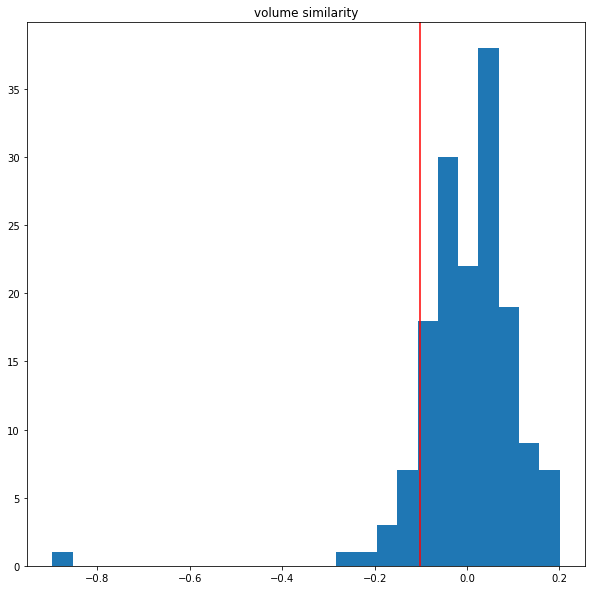

In [117]:
# higher is better 
vs_thresh = np.quantile(vizRes.volume_similarity, 0.1)
plt.figure(figsize=(10,10))
plt.hist(vizRes.volume_similarity, bins=25)
plt.axvline(vs_thresh, c='r')
plt.title('volume similarity')
plt.show()

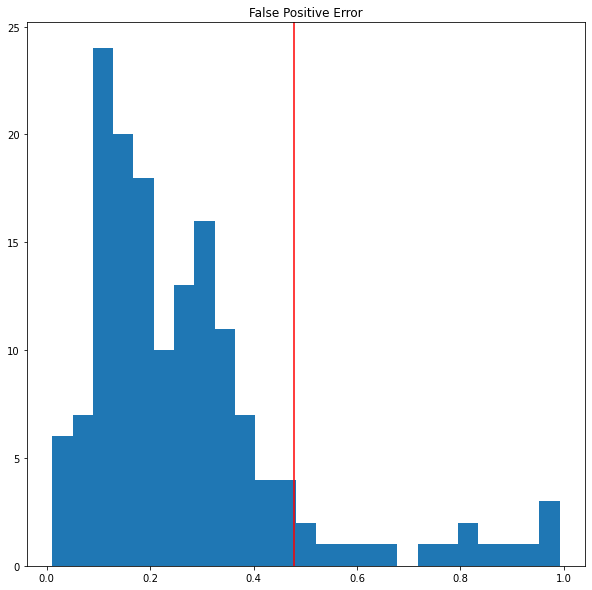

In [113]:
# lower is better 
FP_thresh = np.quantile(vizRes.false_pos_err, 0.9)
plt.figure(figsize=(10,10))
plt.hist(vizRes.false_pos_err, bins=25)
plt.axvline(FP_thresh, c='r')
plt.title('False Positive Error')
plt.show()

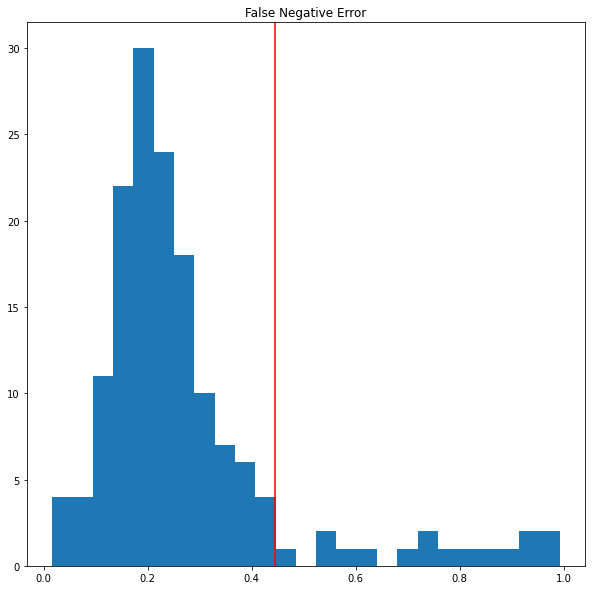

In [114]:
# lower is better 
FN_thresh = np.quantile(vizRes.false_neg_err, 0.9)
plt.figure(figsize=(10,10))
plt.hist(vizRes.false_neg_err, bins=25)
plt.axvline(FN_thresh, c='r')
plt.title('False Negative Error')
plt.show()

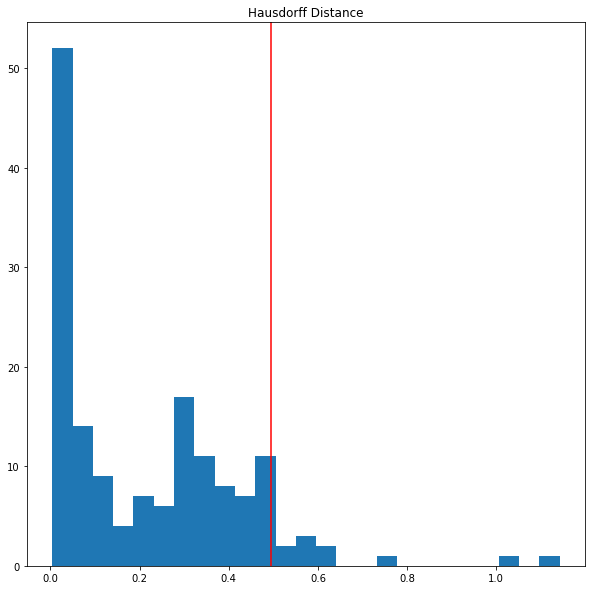

In [116]:
# lower is better 
hd_thresh = np.quantile(vizRes.hausdorff_dist, 0.9)
plt.figure(figsize=(10,10))
plt.hist(vizRes.hausdorff_dist, bins=25)
plt.axvline(hd_thresh, c='r')
plt.title('Hausdorff Distance')
plt.show()

In [120]:
outRes = regRes[lambda x: (x.volume_similarity < vs_thresh) | (x.false_pos_err > FP_thresh) | (x.false_neg_err > FN_thresh) | (x.hausdorff_dist > hd_thresh)]

print('number of outliers:', outRes.shape[0])

number of outliers: 46


## inspect possible outliers

##################################################
registered_core=56_round=R2_color=c1.tif
##################################################


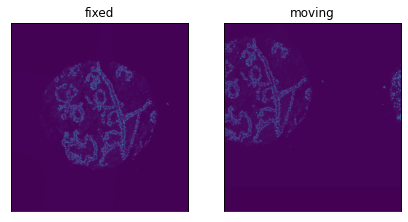

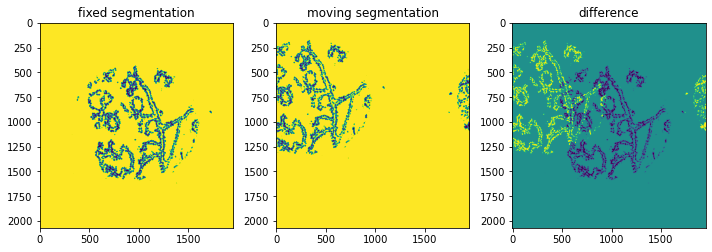

##################################################
registered_core=76_round=R2_color=c1.tif
##################################################


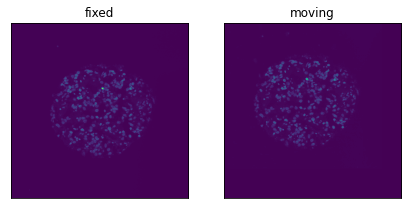

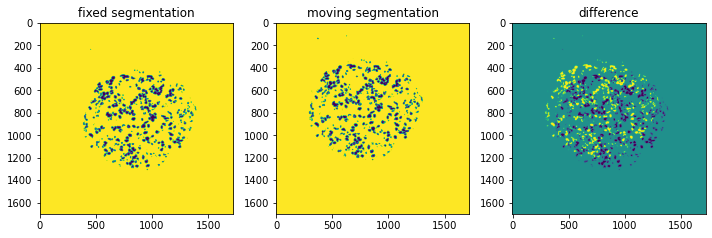

##################################################
registered_core=55_round=R2_color=c1.tif
##################################################


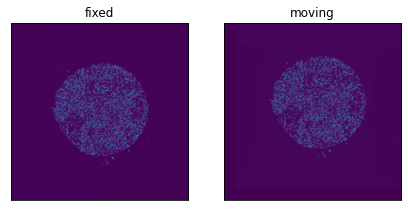

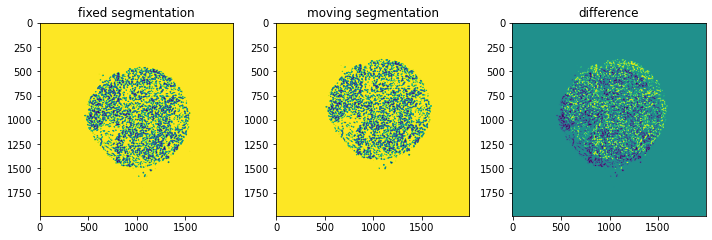

##################################################
registered_core=74_round=R1_color=c1.tif
##################################################


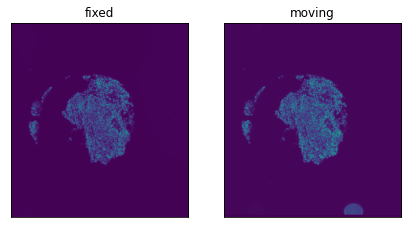

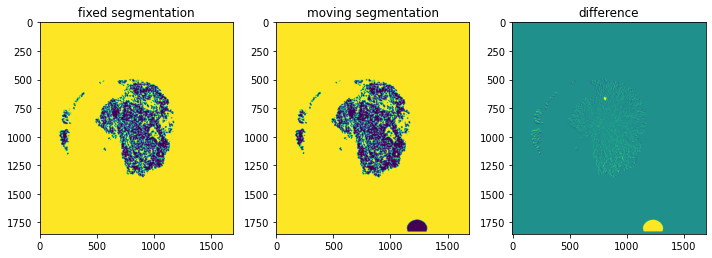

##################################################
registered_core=2_round=R1_color=c1.tif
##################################################


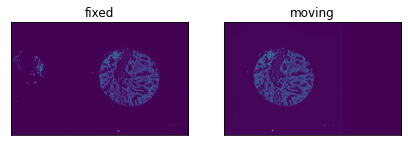

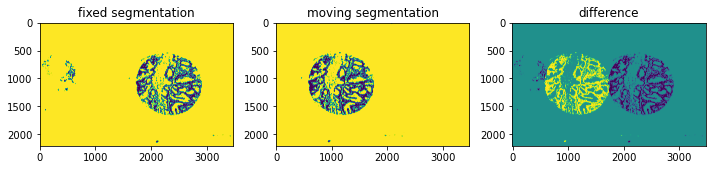

##################################################
registered_core=2_round=R2_color=c1.tif
##################################################


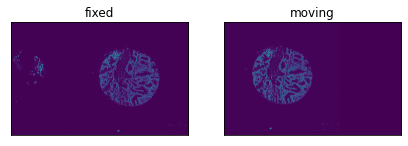

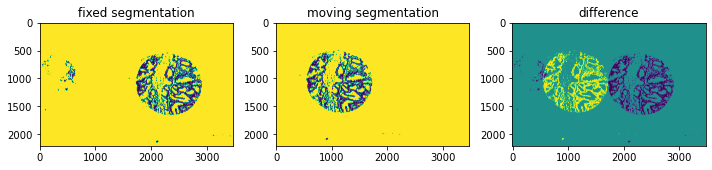

##################################################
registered_core=1_round=R2_color=c1.tif
##################################################


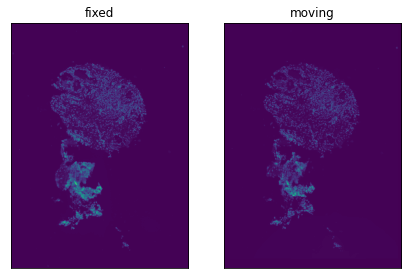

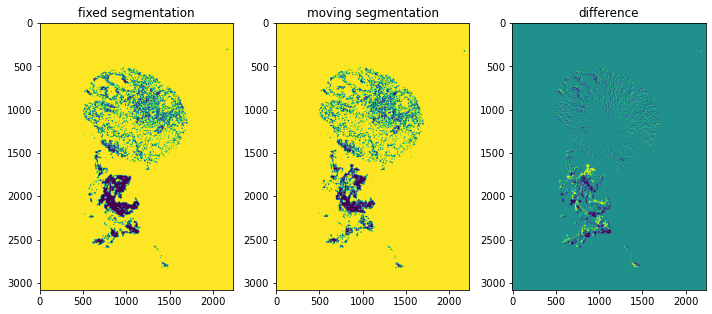

##################################################
registered_core=66_round=R2_color=c1.tif
##################################################


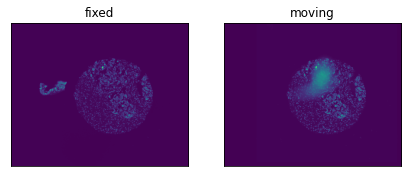

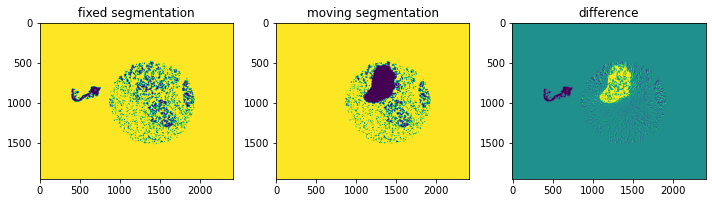

##################################################
registered_core=22_round=R1_color=c1.tif
##################################################


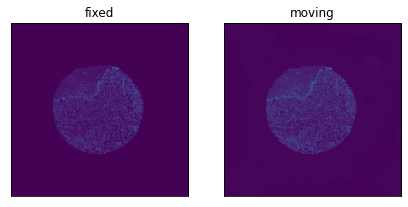

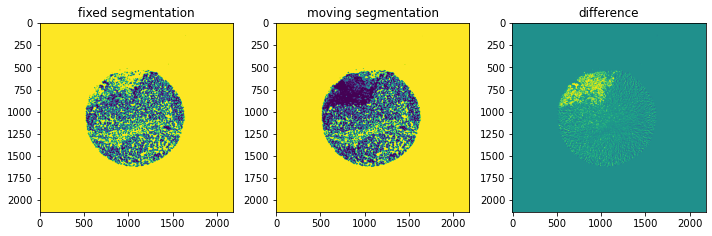

##################################################
registered_core=59_round=R2_color=c1.tif
##################################################


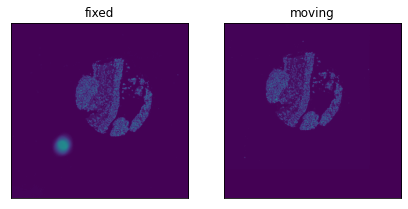

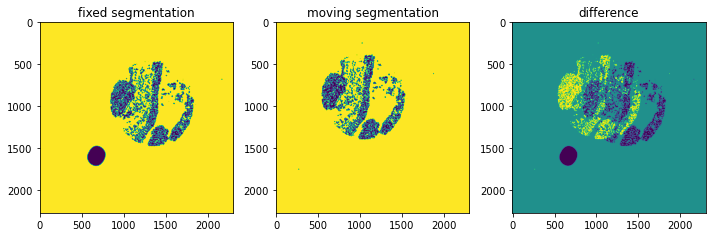

##################################################
registered_core=26_round=R1_color=c1.tif
##################################################


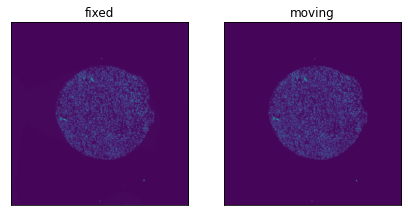

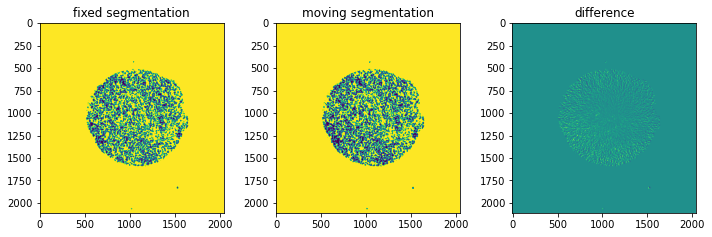

##################################################
registered_core=20_round=R1_color=c1.tif
##################################################


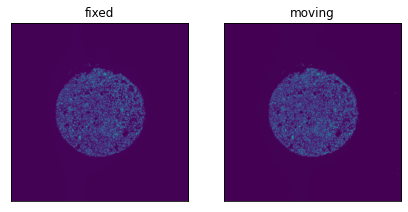

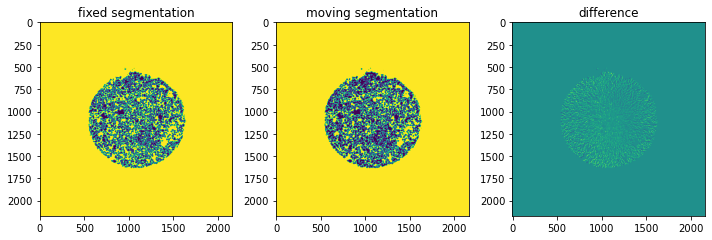

##################################################
registered_core=20_round=R2_color=c1.tif
##################################################


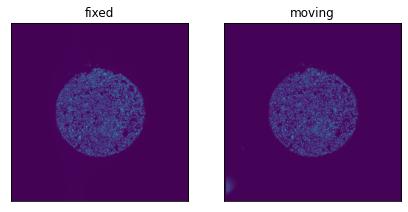

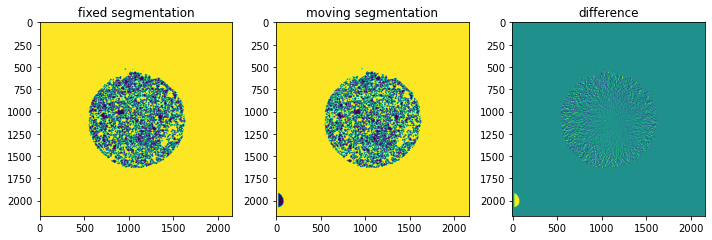

##################################################
registered_core=45_round=R2_color=c1.tif
##################################################


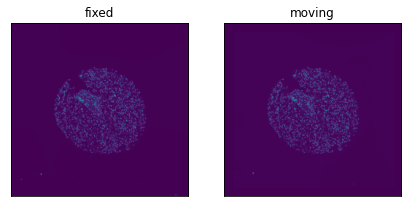

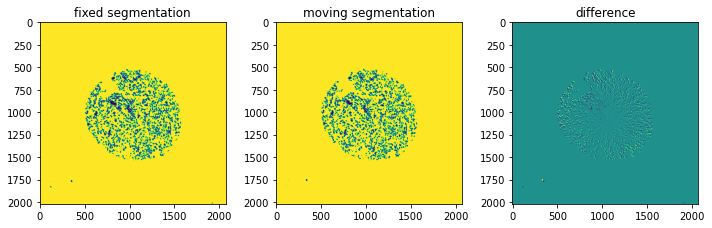

##################################################
registered_core=45_round=R1_color=c1.tif
##################################################


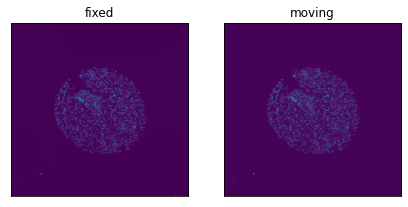

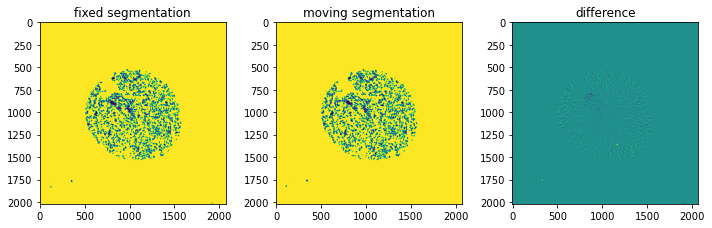

##################################################
registered_core=27_round=R1_color=c1.tif
##################################################


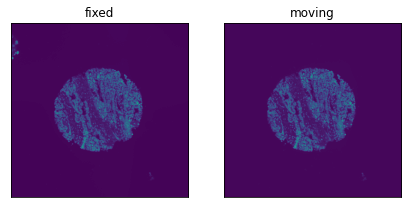

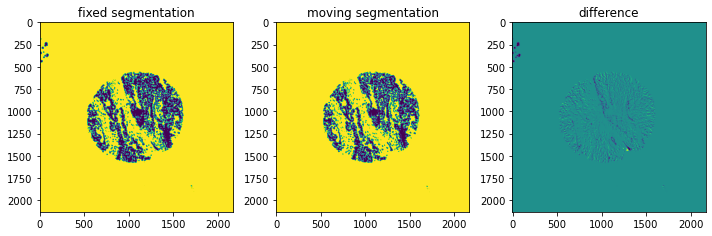

##################################################
registered_core=27_round=R2_color=c1.tif
##################################################


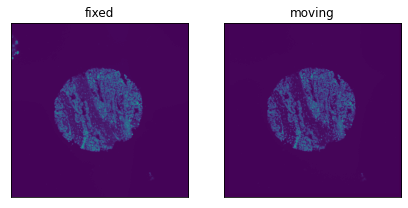

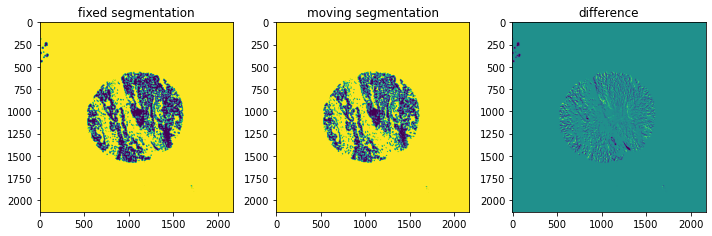

##################################################
registered_core=21_round=R2_color=c1.tif
##################################################


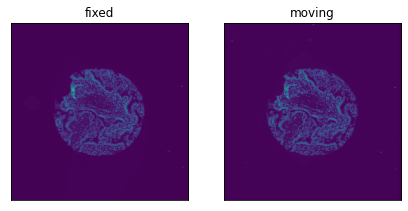

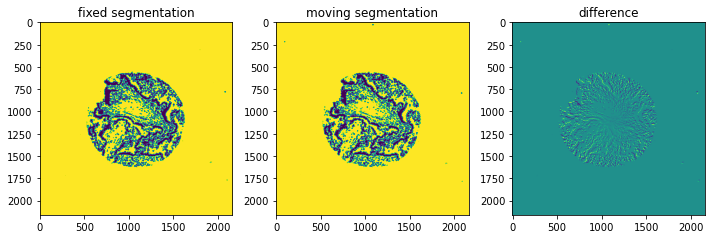

##################################################
registered_core=36_round=R1_color=c1.tif
##################################################


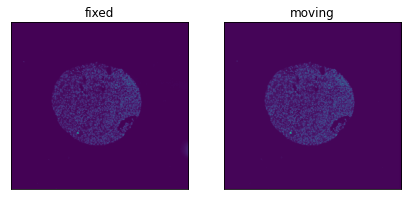

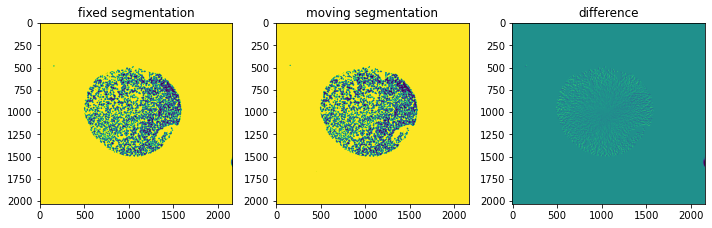

##################################################
registered_core=36_round=R2_color=c1.tif
##################################################


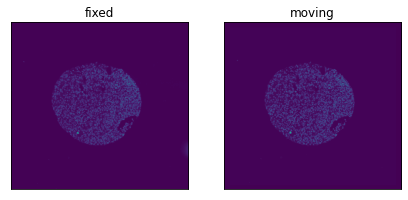

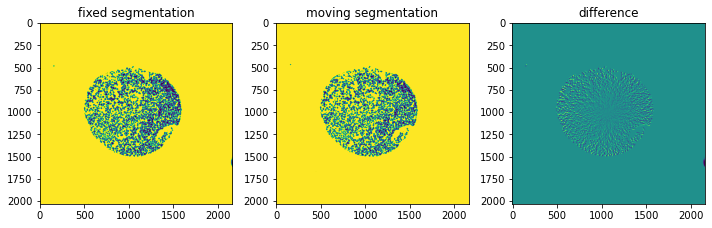

##################################################
registered_core=48_round=R1_color=c1.tif
##################################################


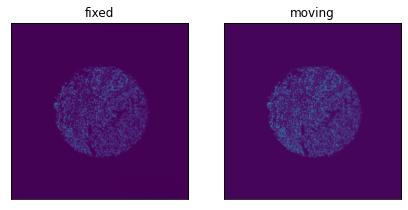

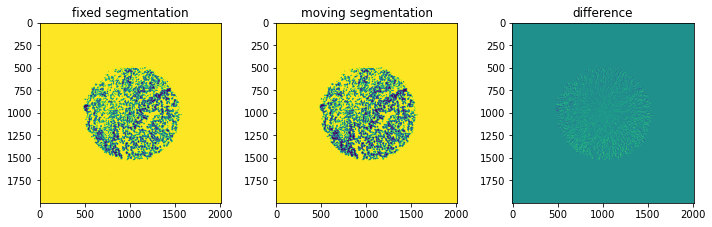

##################################################
registered_core=37_round=R2_color=c1.tif
##################################################


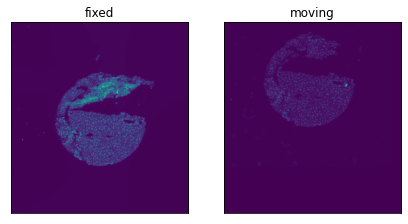

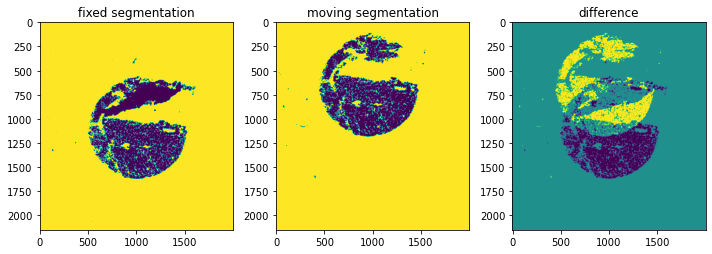

##################################################
registered_core=67_round=R1_color=c1.tif
##################################################


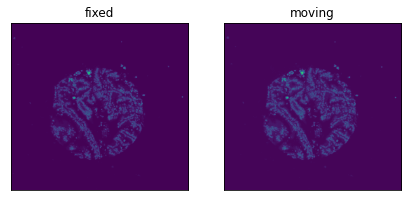

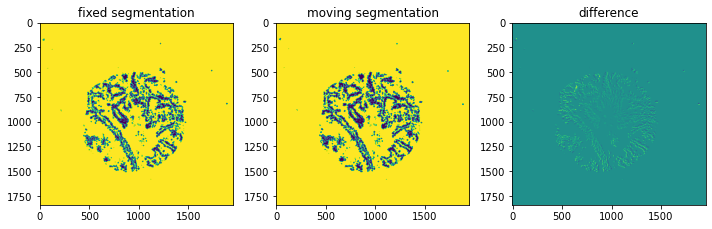

##################################################
registered_core=64_round=R2_color=c1.tif
##################################################


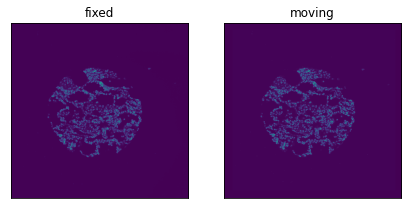

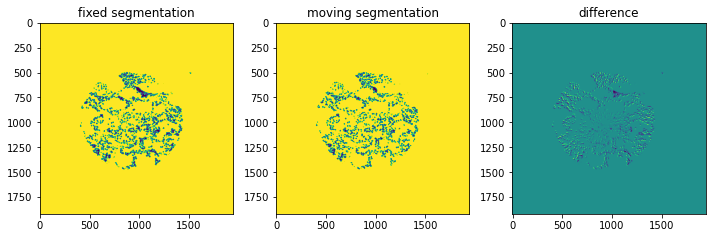

##################################################
registered_core=5_round=R2_color=c1.tif
##################################################


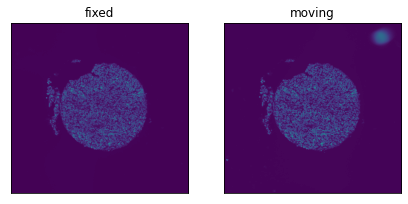

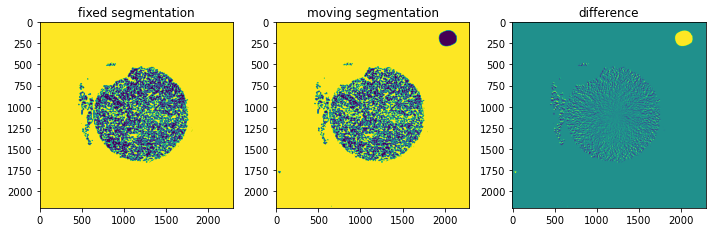

##################################################
registered_core=15_round=R2_color=c1.tif
##################################################


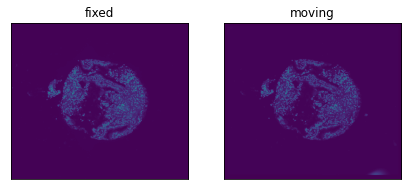

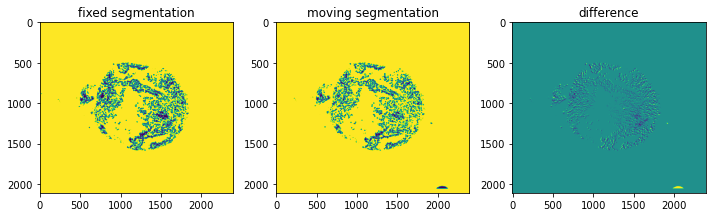

##################################################
registered_core=15_round=R1_color=c1.tif
##################################################


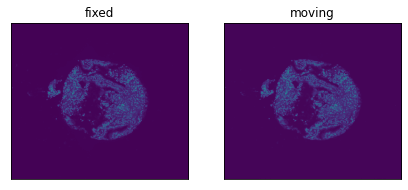

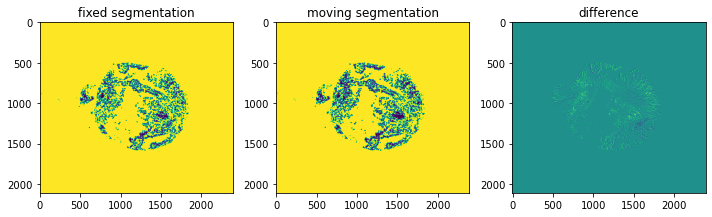

##################################################
registered_core=40_round=R2_color=c1.tif
##################################################


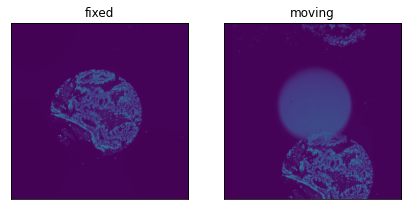

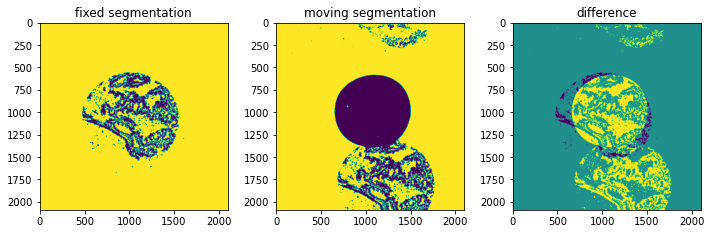

##################################################
registered_core=41_round=R1_color=c1.tif
##################################################


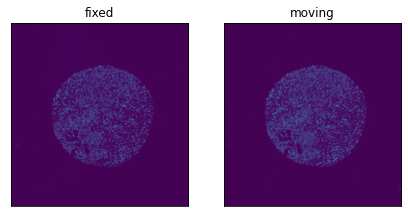

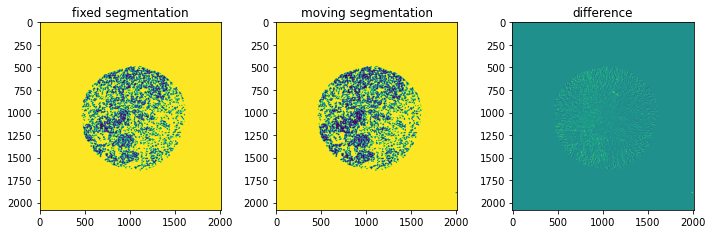

##################################################
registered_core=81_round=R1_color=c1.tif
##################################################


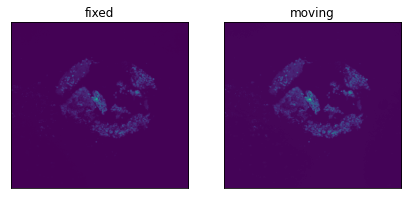

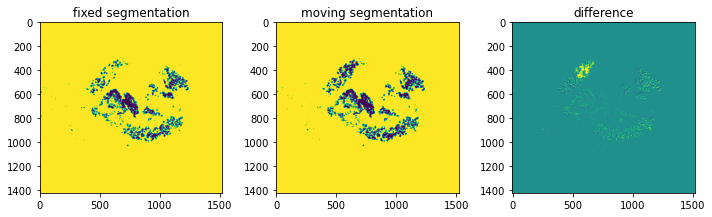

##################################################
registered_core=68_round=R2_color=c1.tif
##################################################


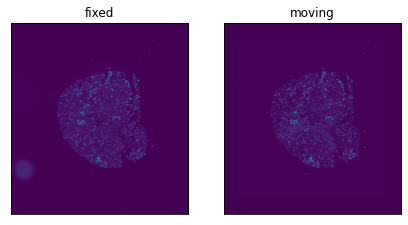

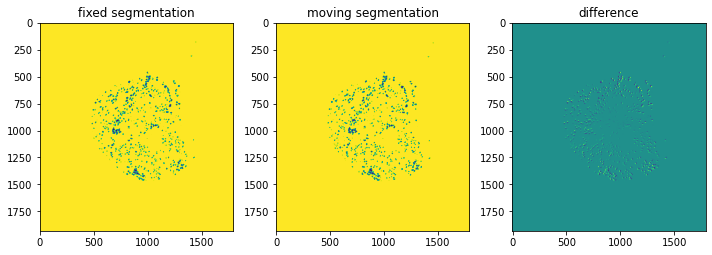

##################################################
registered_core=10_round=R1_color=c1.tif
##################################################


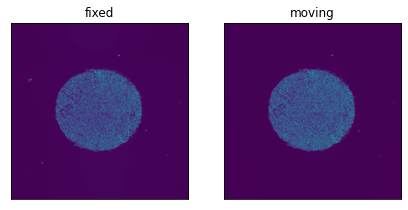

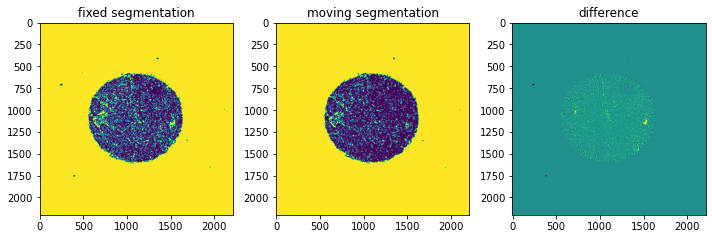

##################################################
registered_core=35_round=R1_color=c1.tif
##################################################


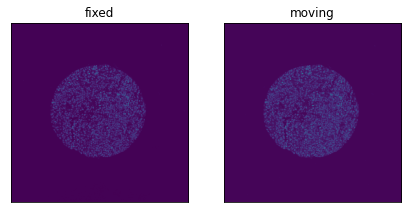

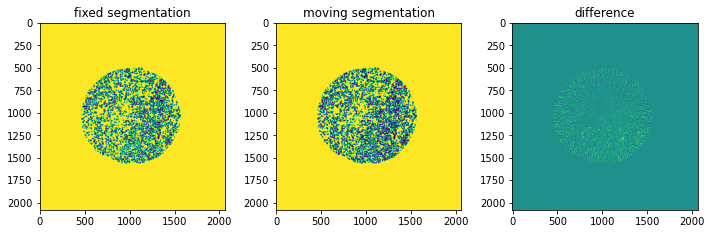

##################################################
registered_core=78_round=R2_color=c1.tif
##################################################


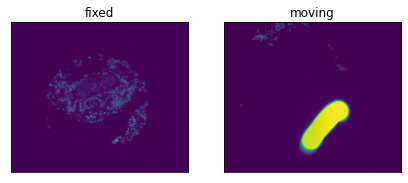

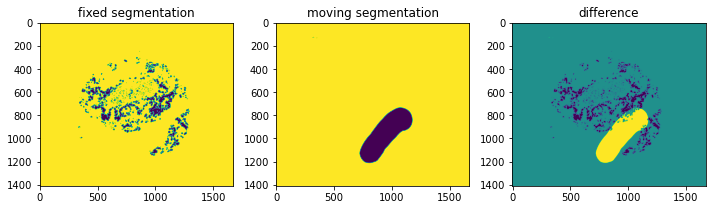

##################################################
registered_core=16_round=R2_color=c1.tif
##################################################


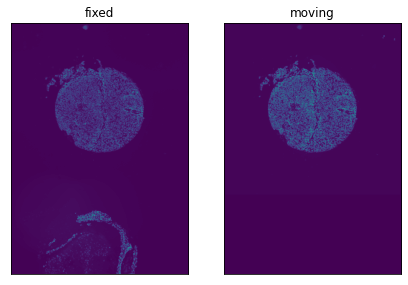

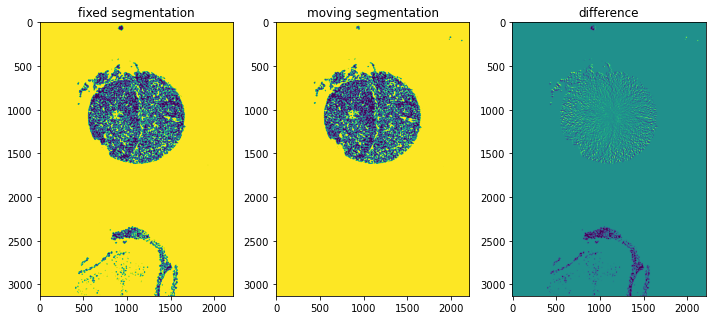

##################################################
registered_core=16_round=R1_color=c1.tif
##################################################


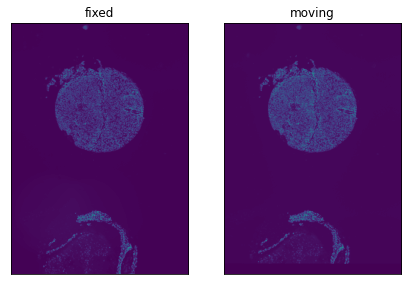

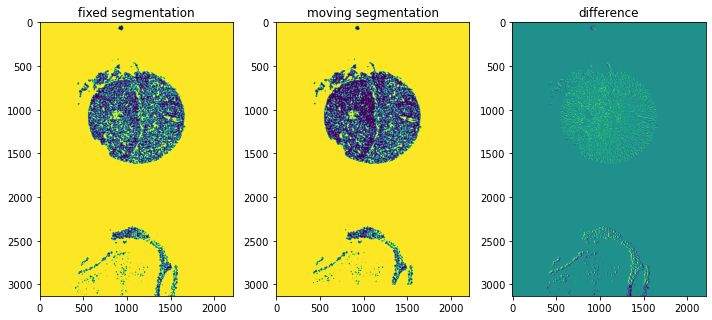

##################################################
registered_core=18_round=R1_color=c1.tif
##################################################


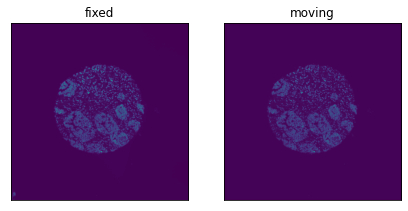

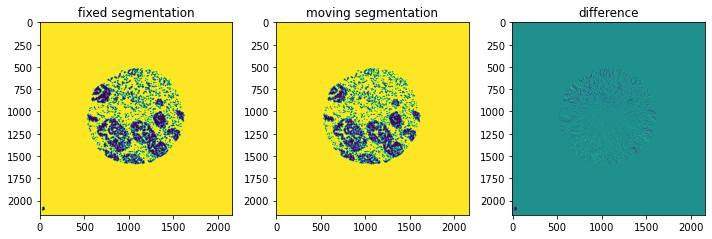

##################################################
registered_core=18_round=R2_color=c1.tif
##################################################


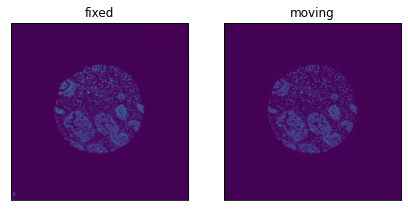

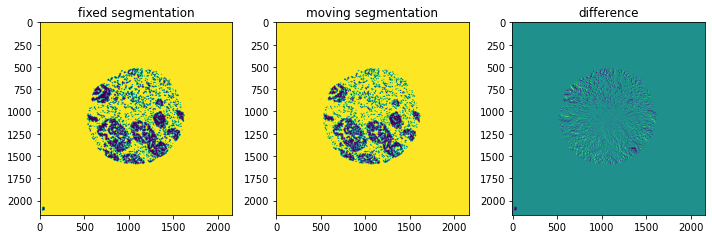

##################################################
registered_core=70_round=R2_color=c1.tif
##################################################


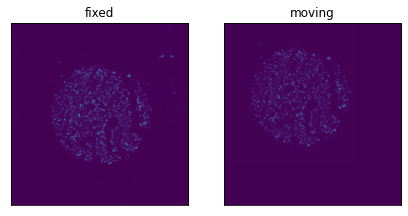

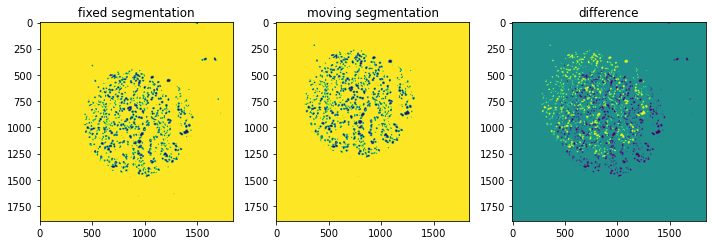

##################################################
registered_core=70_round=R1_color=c1.tif
##################################################


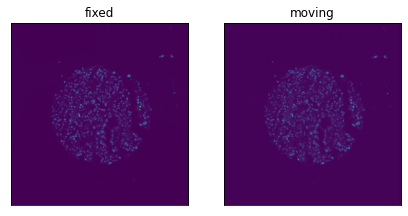

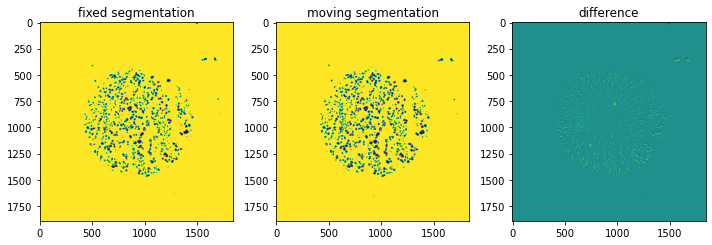

##################################################
registered_core=12_round=R1_color=c1.tif
##################################################


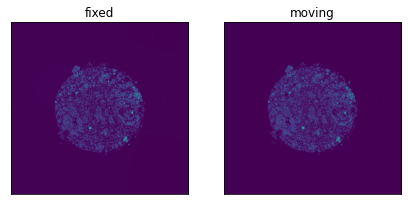

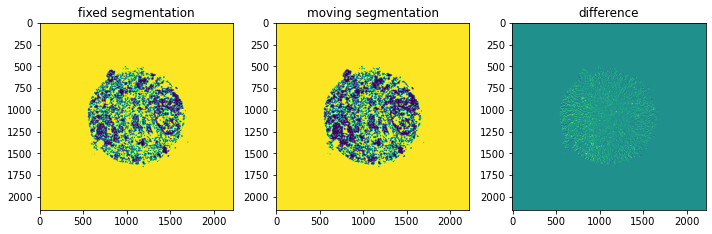

##################################################
registered_core=54_round=R2_color=c1.tif
##################################################


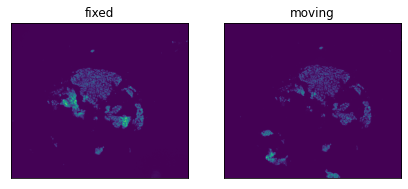

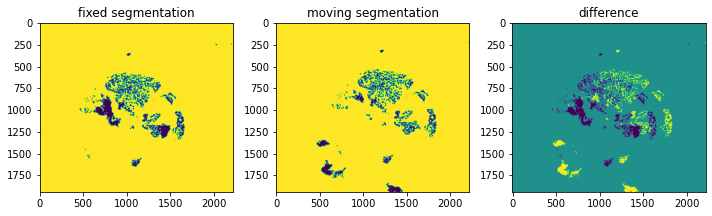

##################################################
registered_core=34_round=R2_color=c1.tif
##################################################


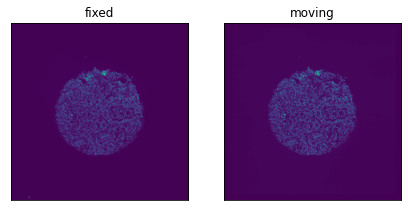

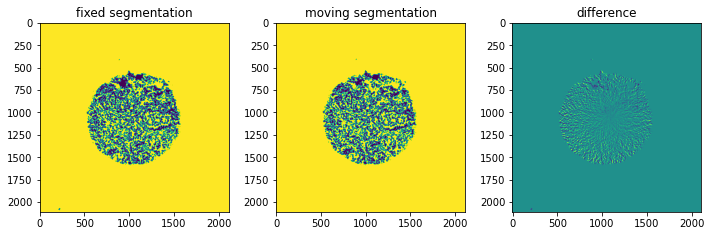

##################################################
registered_core=77_round=R2_color=c1.tif
##################################################


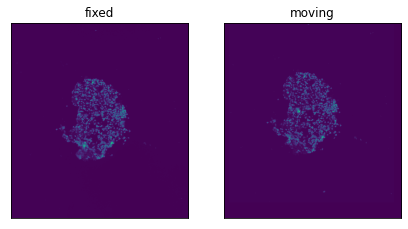

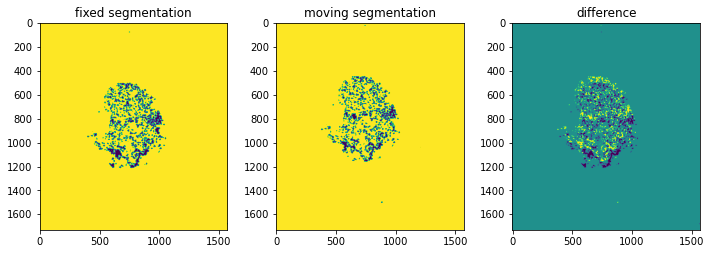

##################################################
registered_core=77_round=R1_color=c1.tif
##################################################


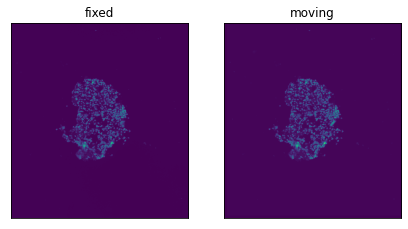

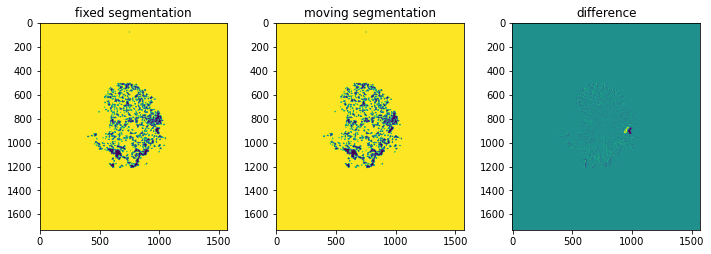

##################################################
registered_core=46_round=R2_color=c1.tif
##################################################


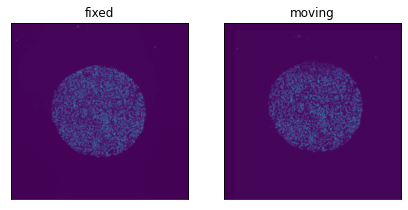

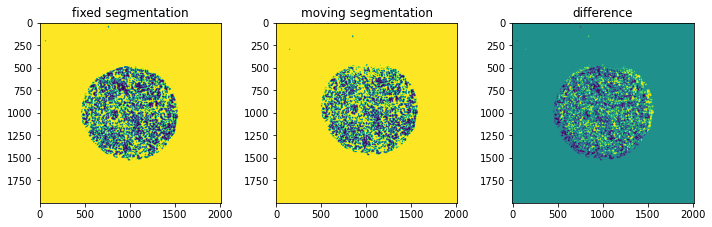

In [121]:
# for each core 
for i, row in outRes.iterrows(): 
    print('#'*50)
    print(row['name'])
    print('#'*50)
    img = sitk.ReadImage(row.registered_path)
    #utils.myshow(img)
    
    R0_dapi_path = f'{"/".join(row.registered_path.split("/")[:-1])}/unregistered_core={int(row.cluster)}_round=R0_color=c1.tif'
    
    R0_img = sitk.ReadImage(R0_dapi_path)
    #utils.myshow(img)
    
    f, axes = plt.subplots(1,2, figsize=(7,14))
    utils.myshow(R0_img, title='fixed', ax=axes[0])
    utils.myshow(img, title='moving', ax=axes[1])
    
    evaluate.plot_registration(R0_img, img)


In [4]:
core_dir = '/home/exacloud/lustre1/NGSdev/evansna/cyclicIF/output/S3/Scene-1/core-001'
os.listdir(core_dir)

['unregistered_core=1_round=R2_color=c1.tif',
 'unregistered_core=1_round=R2_color=c2.tif',
 'unregistered_core=1_round=R0_color=c3.tif',
 'registered_core=1_round=R2_color=c3.tif',
 'registered_core=1_round=R1_color=c1.tif',
 'unregistered_core=1_round=R2_color=c3.tif',
 'unregistered_core=1_round=R2_color=c4.tif',
 'unregistered_core=1_round=R0_color=c5.tif',
 'registered_core=1_round=R2_color=c4.tif',
 'registered_core=1_round=R1_color=c3.tif',
 'unregistered_core=1_round=R2_color=c5.tif',
 'registered_core=1_round=R2_color=c2.tif',
 'registered_core=1_round=R1_color=c2.tif',
 'registered_core=1_round=R2_color=c5.tif',
 'unregistered_core=1_round=R0_color=c2.tif',
 'unregistered_core=1_round=R1_color=c5.tif',
 'unregistered_core=1_round=R1_color=c3.tif',
 'unregistered_core=1_round=R1_color=c4.tif',
 'unregistered_core=1_round=R1_color=c1.tif',
 'registered_core=1_round=R1_color=c5.tif',
 'registered_core=1_round=R1_color=c4.tif',
 'registered_core=1_round=R2_color=c1.tif',
 'unregi

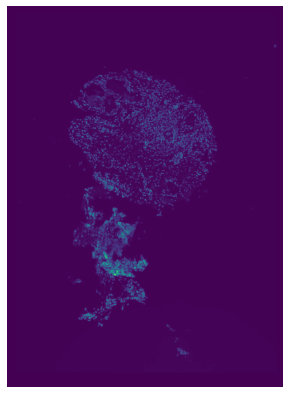

In [14]:
core0 = sitk.ReadImage(core_dir + '/unregistered_core=1_round=R0_color=c1.tif')
utils.myshow(core)

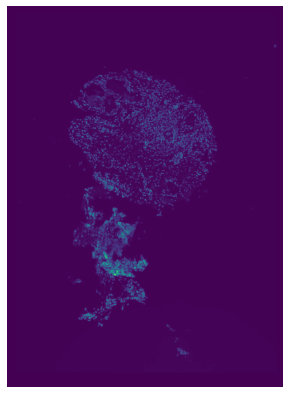

In [15]:
core1 = sitk.ReadImage(core_dir + '/registered_core=1_round=R1_color=c1.tif')
utils.myshow(core)

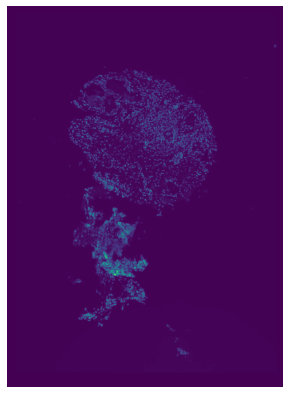

In [16]:
core2 = sitk.ReadImage(core_dir + '/registered_core=1_round=R2_color=c1.tif')
utils.myshow(core)

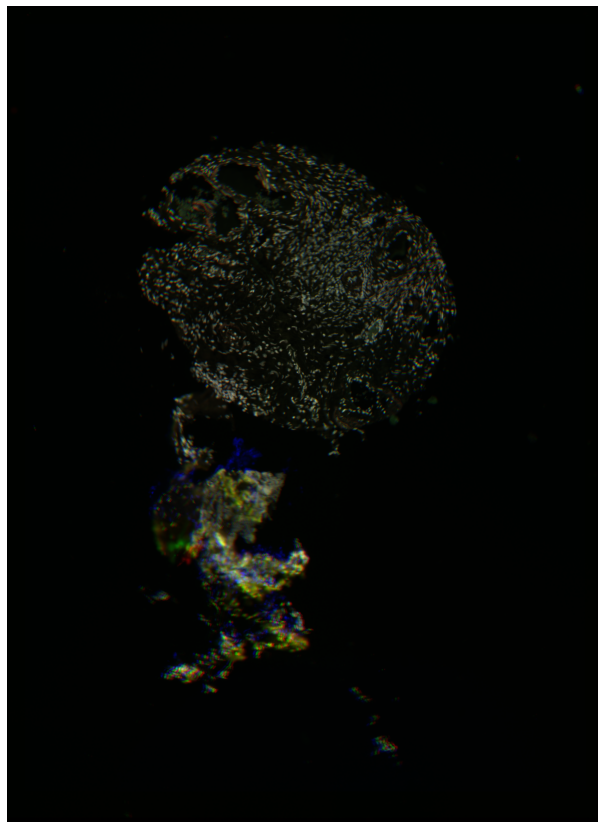

In [19]:
sigm1 = sitk.Cast(sitk.RescaleIntensity(core0), sitk.sitkUInt8)
sigm2 = sitk.Cast(sitk.RescaleIntensity(core1), sitk.sitkUInt8)
sigm3 = sitk.Cast(sitk.RescaleIntensity(core2), sitk.sitkUInt8)

cimg = sitk.Compose(sigm1, sigm2, sigm3)

utils.myshow(cimg, figsize=(15,15))

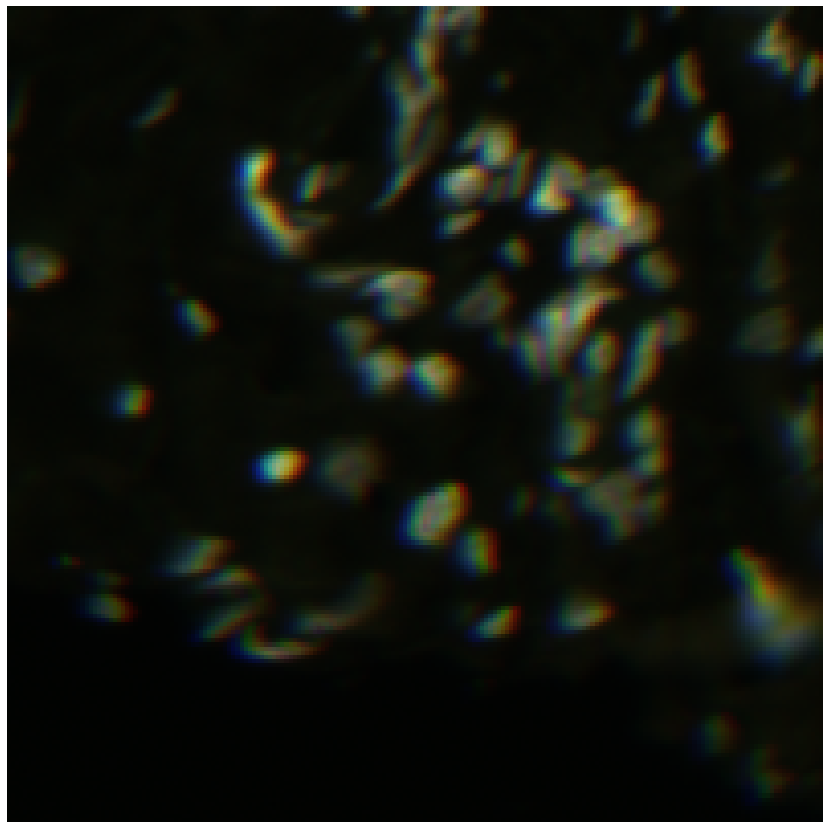

In [22]:
wsize = 100
x,y = cimg.GetSize()
utils.myshow(cimg[int(x/2-wsize):int(x/2+wsize), int(y/2-wsize):int(y/2+wsize)], figsize=(15,15))